In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.core.display import Image
import numpy as np
import pandas as pd
import os
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import imageio.v2 as imageio
from keras.preprocessing.image import ImageDataGenerator

TrainingImagePath='/content/drive/MyDrive/Smoke/train'
TestingImagePath='/content/drive/MyDrive/Smoke/test'
ValidificationImagePath='/content/drive/MyDrive/Smoke/valid'

train_datagen = ImageDataGenerator (
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(
      TrainingImagePath,
      target_size=(128,128),
      batch_size=32 ,
      class_mode='categorical')
test_set=test_datagen.flow_from_directory(
      TestingImagePath,
      target_size=(128,128),
      batch_size=32,
      class_mode='categorical')
valid_set=test_datagen.flow_from_directory(
      ValidificationImagePath,
      target_size=(128,128),
      batch_size=32,
      class_mode='categorical')

train_size=len(training_set)
val_size=len(valid_set)
test_size=len(test_set.class_indices)



Found 350 images belonging to 2 classes.
Found 9467 images belonging to 2 classes.
Found 1053 images belonging to 2 classes.


In [ ]:
test_set.class_indices
{'not plume' : 0,
    'plume' : 1}

{'not plume': 0, 'plume': 1}

In [ ]:
TrainClasses=training_set.class_indices
ResultMap ={}
for plumeValue, plumeName in zip(TrainClasses.values(),TrainClasses.keys()) :
  ResultMap[plumeValue]=plumeName

print("Mapping of Pace and its ID", ResultMap)
OutputNeurons=len(ResultMap)





Mapping of Pace and its ID {0: 'no', 1: 'smoke plume'}


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

classifier = Sequential()

classifier.add(Convolution2D(32, kernel_size=(3,3), strides = (1,1), input_shape=(128,128,3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(64, kernel_size=(3,3), strides = (1,1),  activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(256, activation='relu'))
classifier.add(Dense(OutputNeurons, activation='sigmoid'))
classifier.compile(loss='binary_crossentropy', optimizer= 'rmsprop', metrics = ["accuracy"])




In [ ]:
import time
StartTime=time.time()

model_history= classifier.fit(
                                          training_set,
                                          steps_per_epoch=train_size,
                                          epochs=10,
                                          validation_data=valid_set,
                                          validation_steps=val_size,
                                          verbose=1)
EndTime=time.time()




Epoch 1/10
11/11 [==============================] - 478s 47s/step - loss: 0.6134 - accuracy: 0.8629 - val_loss: 0.1262 - val_accuracy: 0.9677
Epoch 2/10
11/11 [==============================] - 37s 3s/step - loss: 0.2266 - accuracy: 0.9457 - val_loss: 0.1108 - val_accuracy: 0.9677
Epoch 3/10
11/11 [==============================] - 27s 2s/step - loss: 0.1544 - accuracy: 0.9514 - val_loss: 0.0979 - val_accuracy: 0.9677
Epoch 4/10
11/11 [==============================] - 38s 4s/step - loss: 0.1745 - accuracy: 0.9371 - val_loss: 0.0836 - val_accuracy: 0.9677
Epoch 5/10
11/11 [==============================] - 36s 3s/step - loss: 0.1193 - accuracy: 0.9600 - val_loss: 0.0724 - val_accuracy: 0.9810
Epoch 6/10
11/11 [==============================] - 36s 3s/step - loss: 0.0829 - accuracy: 0.9771 - val_loss: 0.0673 - val_accuracy: 0.9839
Epoch 7/10
11/11 [==============================] - 27s 2s/step - loss: 0.1023 - accuracy: 0.9629 - val_loss: 0.0917 - val_accuracy: 0.9820
Epoch 8/10
11/11 [

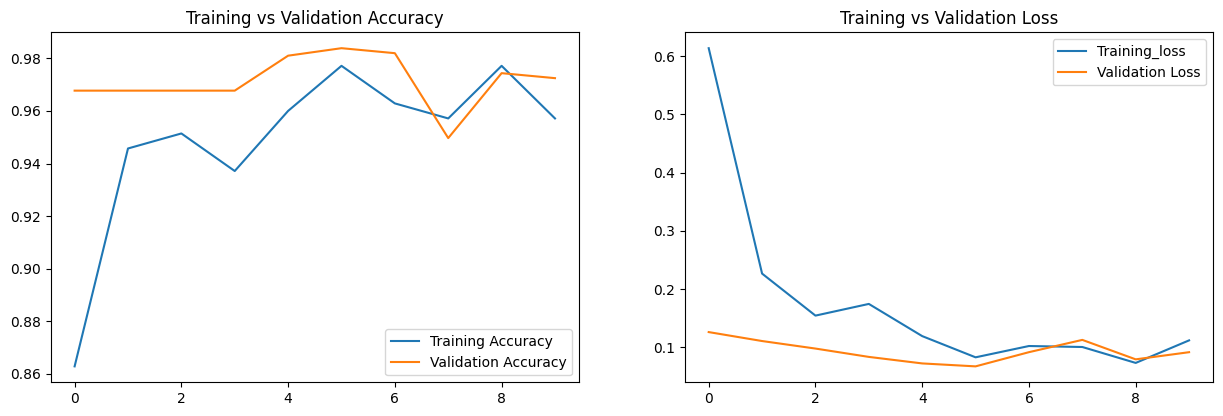

In [ ]:
accuracy = model_history.history['accuracy']
val_accuracy=model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss=model_history.history['val_loss']
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(accuracy,label="Training Accuracy")
plt.plot(val_accuracy,label="Validation Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

plt.subplot(2,2,2)
plt.plot(loss, label="Training_loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

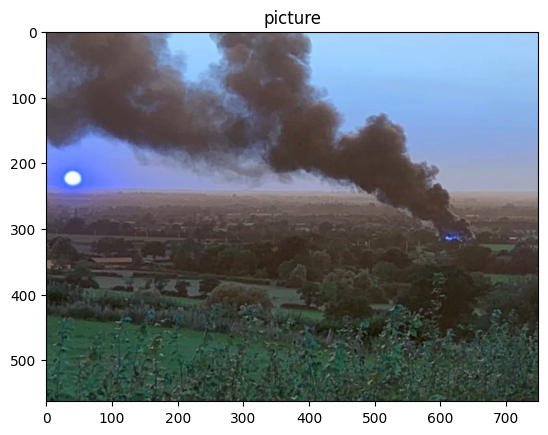

Prediction is:  smoke plume


FileNotFoundError: [Errno 2] No such file or directory: 'https://www.darkknightarmoury.com/wp-content/uploads/2019/10/OP15LB-PU.jpg'

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

test_images = [ '/content/drive/MyDrive/Smoke/test/smoke plume/240811861_10165560818685254_5224664332591905291_n-750x563.jpg',
               'https://www.darkknightarmoury.com/wp-content/uploads/2019/10/OP15LB-PU.jpg',
                'https://images.unsplash.com/photo-1556388275-bb5585725aca?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8c21va2V8ZW58MHx8MHx8fDA%3D&w=1000&q=80' ]

for testImage in test_images:
  test_image=load_img(testImage, target_size=(128,128))
  test_image=img_to_array(test_image)

  test_image=np.expand_dims(test_image, axis=0)
  result=classifier.predict(test_image, verbose=0)

  ##probability_of_positive_class = result[0, 0]

  img= cv2.imread(testImage)
  plt.imshow(img)
  plt.title('picture')
  plt.show()

  print('Prediction is: ', ResultMap[np.argmax(result)])
  ##print('Probability of positive class (smoke plume):', probability_of_positive_class)

In [ ]:
# converts the model to tflite
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(classifier)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

with open('/content/plume_detection_model.tflite', 'wb') as f:
  f.write(tflite_model)